In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.optimize import curve_fit

#Use better looking plot settings
plt.rc('font',family='serif')

#Add nifty official colors
RootOrange = '#FF5715'
Orange120 = '#EE4300'

In [2]:
## Read in the advertising data
RootData = pd.read_csv("Root_Insurance_data.csv")
RootData


,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold
0,unknown,2,1,M,10.0,2,False,0
1,Y,3,1,M,10.0,5,False,0
2,Y,3,2,M,10.0,5,False,0
3,N,3,2,S,10.0,4,False,0
4,unknown,2,2,S,10.0,2,False,0
...,...,...,...,...,...,...,...,...
9995,N,1,2,S,10.0,3,True,0
9996,unknown,3,2,M,10.0,3,False,0
9997,Y,3,1,S,10.0,5,False,0
9998,unknown,3,1,M,10.0,3,False,0


In [3]:
def basic_info(Category=None, Value=None, RankNum=0, printout=True):
    # Find the clicks per ad, policies sold per ad, and policies sold per click for a subset of the data
    # Return these values, along with their associated uncertainties
    
    if Category==None: #get all the data without cutting on a condition
        ad_clicks = len( RootData.loc[RootData["click"]==True] )
        policies_sold = len( RootData.loc[RootData["policies_sold"]==1] )
        total_ads = len(RootData)
        print(total_ads,'total ads')
        print(ad_clicks,'ad clicks')
        print(policies_sold,'policies sold')
    elif RankNum == 0: #look at only the data specified by the Category and its Value
        ad_clicks = len(RootData.loc[(RootData["click"]==True) & (RootData[Category]==Value)])
        policies_sold = len(RootData.loc[(RootData["policies_sold"]==1) & (RootData[Category]==Value)])
        total_ads = len(RootData.loc[RootData[Category]==Value])
    else: #look at only the data specified by the Category and its Value for rank=RankNum
        ad_clicks = len(RootData.loc[(RootData["click"]==True) & (RootData["rank"]==RankNum) & (RootData[Category]==Value)])
        policies_sold = len(RootData.loc[(RootData["policies_sold"]==1) & (RootData["rank"]==RankNum) & (RootData[Category]==Value)])
        total_ads = len(RootData.loc[(RootData["rank"]==RankNum) & (RootData[Category]==Value)])
    
    if total_ads > 0:
        clicks_per_ad = ad_clicks/total_ads
        policies_per_ad = policies_sold/total_ads
        policies_per_click = policies_per_ad/clicks_per_ad
        err_clicks_per_ad = clicks_per_ad * np.sqrt((np.sqrt(ad_clicks)/ad_clicks)**2+(np.sqrt(total_ads)/total_ads)**2 )
        err_policies_per_ad = policies_per_ad * np.sqrt((np.sqrt(policies_sold)/policies_sold)**2+(np.sqrt(total_ads)/total_ads)**2 )
        err_policies_per_click = policies_per_click * np.sqrt((err_policies_per_ad/policies_per_ad)**2+(err_clicks_per_ad/clicks_per_ad)**2 )
    else:
        return ['---', '---', '---', '---', '---', '---']
    
    if printout == True:
        print(round(clicks_per_ad,3),'+/-',round(err_clicks_per_ad,4),'clicks per ad')
        print(round(policies_per_ad,3),'+/-',round(err_policies_per_ad,4),'policies sold per ad')
        print(round(policies_per_click,3),'+/-',round(err_policies_per_click,4),'policies sold per click')
    
    return [clicks_per_ad, err_clicks_per_ad,
            policies_per_ad, err_policies_per_ad,
            policies_per_click, err_policies_per_click]

In [4]:
#Let's check out basic information for each of our categories
print('Aggregate for all ads:')
basic_info()
print()
print('Ads targeting those known to currently have insurance:')
basic_info("Currently Insured","Y")
print('Ads targeting those known NOT to currently have insurance:')
basic_info("Currently Insured","N")
print('Ads targeting those of unknown insurance status:')
basic_info("Currently Insured","unknown")
print()
print('Ads targeting those with 1 vehicle:')
basic_info("Number of Vehicles",1)
print('Ads targeting those with 2 vehicles:')
basic_info("Number of Vehicles",2)
print('Ads targeting those with 3 vehicles:')
basic_info("Number of Vehicles",3)
print()
print('Ads targeting those with 1 driver:')
basic_info("Number of Drivers",1)
print('Ads targeting those with 2 drivers:')
basic_info("Number of Drivers",2)
print()
print('Ads targeting those who are single:')
basic_info("Marital Status","S")
print('Ads targeting those who are married:')
basic_info("Marital Status","M")
print()

Aggregate for all ads:
10000 total ads
1878 ad clicks
783 policies sold
0.188 +/- 0.0047 clicks per ad
0.078 +/- 0.0029 policies sold per ad
0.417 +/- 0.0187 policies sold per click

Ads targeting those known to currently have insurance:
0.121 +/- 0.0063 clicks per ad
0.039 +/- 0.0034 policies sold per ad
0.322 +/- 0.033 policies sold per click
Ads targeting those known NOT to currently have insurance:
0.113 +/- 0.006 clicks per ad
0.051 +/- 0.0039 policies sold per ad
0.448 +/- 0.0423 policies sold per click
Ads targeting those of unknown insurance status:
0.343 +/- 0.0121 clicks per ad
0.152 +/- 0.0075 policies sold per ad
0.442 +/- 0.0268 policies sold per click

Ads targeting those with 1 vehicle:
0.279 +/- 0.0102 clicks per ad
0.128 +/- 0.0065 policies sold per ad
0.457 +/- 0.0285 policies sold per click
Ads targeting those with 2 vehicles:
0.163 +/- 0.0074 clicks per ad
0.062 +/- 0.0044 policies sold per ad
0.382 +/- 0.032 policies sold per click
Ads targeting those with 3 vehicl

In [5]:
#Let's see if rank values have any obvious correlation to policies sold per click
rank_vals = [1,2,3,4,5]
cpa_ranks = []
cpa_err_ranks = []
pspc_ranks = []
pspc_err_ranks = []
for rank_val in rank_vals:
    info_params = basic_info("rank",rank_val,printout=False)
    cpa_ranks.append( info_params[0] ) #first entry returns clicks per ad
    cpa_err_ranks.append( info_params[1] ) #second entry returns the uncertainty in clicks per ad
    pspc_ranks.append( info_params[4] ) #fifth entry returns policies sold per click
    pspc_err_ranks.append( info_params[5] ) #sixth entry returns the uncertainty in policies sold per click

rank_df = pd.DataFrame({
                        'Rank':rank_vals,
                        'Clicks per Ad':cpa_ranks,
                        'Clicks per Ad Uncertainty':cpa_err_ranks
                        })

#Let's try an exponential since it feels like a form that'd make sense here
def f_exp(x, B0, B1):
    return B0*np.exp(B1*x)

x = np.linspace(1,5,50)

fit_exp_betas, fit_exp_cov = curve_fit(f_exp, rank_df["Rank"], rank_df["Clicks per Ad"],
                                       sigma=cpa_err_ranks, absolute_sigma=True, method='trf')
regression_exp = f_exp(x,fit_exp_betas[0],fit_exp_betas[1]) #fit_exp_betas[0]*np.(fit_exp_betas[1]*x)

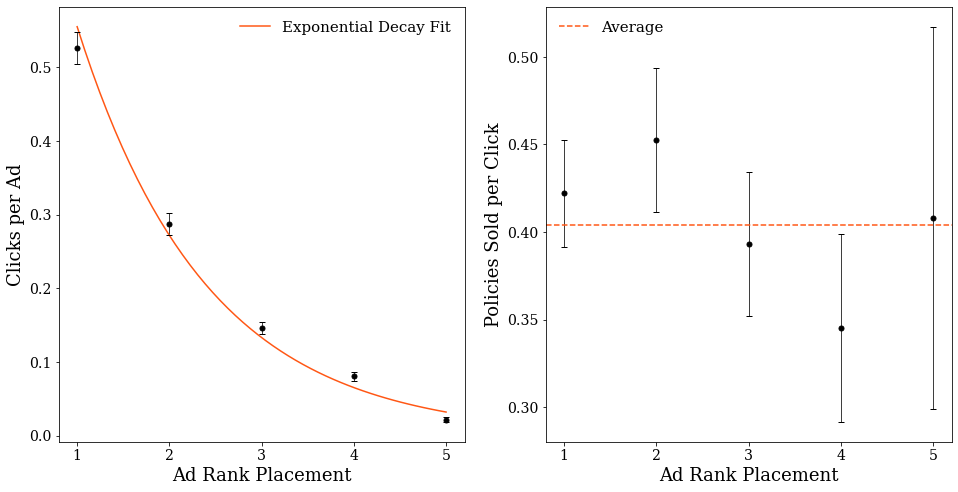

In [6]:
#Make nice figure for presentation
plt.figure(figsize=(16,8))

#First look at clicks per ad as a function of rank placement
plt.subplot(1,2,1)

plt.plot(x, regression_exp, color=RootOrange, label='Exponential Decay Fit')
plt.errorbar(x=rank_vals, y=cpa_ranks, yerr=cpa_err_ranks, color='k', fmt='o',
             capsize=3, linewidth=0.75, markersize=5)

plt.legend(fontsize=15,frameon=False)
plt.xlabel('Ad Rank Placement',fontsize=18)
plt.ylabel('Clicks per Ad',fontsize=18)
plt.xticks([1,2,3,4,5],fontsize=14)
plt.yticks(fontsize=14)

#Second look at policies sold per click as a function of rank placement
plt.subplot(1,2,2)
plt.errorbar(x=rank_vals, y=pspc_ranks, yerr=pspc_err_ranks, color='k', fmt='o',
             capsize=3, linewidth=0.75, markersize=5)
mean_pspc = np.mean(pspc_ranks)
plt.axhline(mean_pspc,color=RootOrange,linestyle='--',label='Average')

plt.legend(fontsize=15,frameon=False)
plt.xlabel('Ad Rank Placement',fontsize=18)
plt.ylabel('Policies Sold per Click',fontsize=18)
plt.xticks([1,2,3,4,5],fontsize=14)
plt.yticks(fontsize=14)

plt.show()

So it is clear that rank placement plays a strong role in determining clicks per ad, but once you succeed in getting the customer to actually click on the ad it seems to stop being a factor. The error bars in the plots above are $1\sigma$, so if it is true that policies sold per click is unaffected by rank placement, we would expect that for 68\% of the points their uncertainty regions would include the mean. We can see that this is the case for 3 of the 5 points, and by eye we can tell that if we double the error bars to a width of $2\sigma$ (in which case 95\% of the points' uncertainty regions should overlap the mean) it holds true for all 5 of them. Basically, in this scenario we expect that all points are making the same measurement and that is indeed consistent with what we find.

In short: Ad rank placement drives clicks, not sales.

We are relatively limited in how deeply we can analyze this data due to the flat \\\$10 bid strategy, but one pertinent detail we can look into is how other companies are targeting their bids. Namely, if our flat \\\$10 bids are consistently yielding more rank 1 and 2 placements than they are ranks 3 and 4, then we know that competitors are bidding less than \\\$10 for those customers. And the inverse is true for identifying demographics for which competitors are bidding more than \\\$10.

The following code chunk will print out the average rank yielded by our \\\$10 bids for various customer demographics, as well as the total of ranks 1 and 2 compared to the total of ranks 3 and 4, and then based on these figures print out whether competitors are tending to bid more or less than \\\$10 for these customers.

In [7]:
def bid_comp(Category=None, Value=None):
    #If we're consistently getting more ranks 1 and 2 than ranks 3 and 4 with our uniform $10 bidding,
    #then we are likely bidding above what competitors are targeting for a given category
    
    if Category == None:
        ranks = [ len( RootData.loc[RootData["rank"]==i+1] ) for i in range(5) ]
    else:
        ranks = [len( RootData.loc[(RootData["rank"]==i+1) & (RootData[Category]==Value)] ) for i in range(5)]
    
    AvgRank = (1.0*ranks[0]+2.0*ranks[1]+3.0*ranks[2]+4.0*ranks[3]+5.0*ranks[4]) / (ranks[0]+ranks[1]+ranks[2]+ranks[3]+ranks[4])
    print("Average Rank:",round(AvgRank,2))
    if ranks[0] + ranks[1] > ranks[3] + ranks[4]:
        print(Category,Value,':',ranks[0],'+',ranks[1],'>',ranks[3],'+',ranks[4])
        print("Competitors are generally bidding LESS than $10")
    elif ranks[0] + ranks[1] < ranks[3] + ranks[4]:
        print(Category,Value,':',ranks[0],'+',ranks[1],'<',ranks[3],'+',ranks[4])
        print("Competitors are generally bidding MORE than $10")

In [8]:
print('Aggregate for all ads:')
bid_comp()
print()
bid_comp("Currently Insured","Y")
bid_comp("Currently Insured","N")
bid_comp("Currently Insured","unknown")
print()
bid_comp("Number of Vehicles",1)
bid_comp("Number of Vehicles",2)
bid_comp("Number of Vehicles",3)
print()
bid_comp("Number of Drivers",1)
bid_comp("Number of Drivers",2)
print()
bid_comp("Marital Status","S")
bid_comp("Marital Status","M")
print()

Aggregate for all ads:
Average Rank: 3.18
None None : 1611 + 1608 < 2089 + 2291
Competitors are generally bidding MORE than $10

Average Rank: 3.8
Currently Insured Y : 167 + 291 < 961 + 1206
Competitors are generally bidding MORE than $10
Average Rank: 3.73
Currently Insured N : 122 + 374 < 965 + 1085
Competitors are generally bidding MORE than $10
Average Rank: 1.91
Currently Insured unknown : 1322 + 943 > 163 + 0
Competitors are generally bidding LESS than $10

Average Rank: 2.47
Number of Vehicles 1 : 898 + 910 > 531 + 175
Competitors are generally bidding LESS than $10
Average Rank: 3.32
Number of Vehicles 2 : 561 + 463 < 695 + 1001
Competitors are generally bidding MORE than $10
Average Rank: 3.83
Number of Vehicles 3 : 152 + 235 < 863 + 1115
Competitors are generally bidding MORE than $10

Average Rank: 3.29
Number of Drivers 1 : 725 + 740 < 1090 + 1273
Competitors are generally bidding MORE than $10
Average Rank: 3.08
Number of Drivers 2 : 886 + 868 < 999 + 1018
Competitors are

This analysis can also be extended to look at all the inter-category combinations, so let's do that!

In [9]:
# Let's build a DataFrame!

# The idea I'm aiming to investigate is a model where we pick the N best sets of category combinations
# (based on policies sold per click) and set the bids for all other combinations to a minimum value

insured_vals = list( set(RootData["Currently Insured"]) )
vehicles_vals = list( set(RootData["Number of Vehicles"]) )
drivers_vals = list( set(RootData["Number of Drivers"]) )
marital_vals = list( set(RootData["Marital Status"]) )

categories_df = pd.DataFrame({
                        'Insured':[],
                        'Vehicles':[],
                        'Drivers':[],
                        'Marital Status':[],
                        'Policies Sold per Click':[],
                        'Policies Sold per Click Uncertainty':[],
                        'Total Clicks':[],
                        'Total Click Uncertainty':[],
                        'Total Policies Sold':[],
                        'Total Policies Sold Uncertainty':[],
                        'Expected Clicks at Rank 5':[],
                        'Uncertainty in Rank 5 Clicks Estimate':[],
                        'Expected Policies Sold at Rank 5':[],
                        'Uncertainty in Rank 5 Sales Estimate':[],
                        'Expected Clicks per Ad':[],
                        'AvgRank':[],
                        'Rank1':[],
                        'Rank2':[],
                        'Rank3':[],
                        'Rank4':[],
                        'Rank5':[]
                        })

#Will need the expected clicks per ad for an ad displayed in rank 5 (as well as its uncertainty) in a second
R5ExpClickPA = basic_info("rank",5,printout=False)[0]
R5ErrClickPa = basic_info("rank",5,printout=False)[1]

for insured_val in insured_vals:
    for vehicles_val in vehicles_vals:
        for drivers_val in drivers_vals:
            for marital_val in marital_vals:
                Ranks = [ len(RootData.loc[(RootData["rank"]==i+1) & (RootData["Currently Insured"]==insured_val) & (RootData["Number of Vehicles"]==vehicles_val) & (RootData["Number of Drivers"]==drivers_val) & (RootData["Marital Status"]==marital_val)]) for i in range(5) ]
                ad_clicks = len(RootData.loc[(RootData["click"]==True) & (RootData["Currently Insured"]==insured_val) & (RootData["Number of Vehicles"]==vehicles_val) & (RootData["Number of Drivers"]==drivers_val) & (RootData["Marital Status"]==marital_val)])
                policies_sold = len(RootData.loc[(RootData["policies_sold"]==1) & (RootData["Currently Insured"]==insured_val) & (RootData["Number of Vehicles"]==vehicles_val) & (RootData["Number of Drivers"]==drivers_val) & (RootData["Marital Status"]==marital_val)])
                total_ads = len(RootData.loc[(RootData["Currently Insured"]==insured_val) & (RootData["Number of Vehicles"]==vehicles_val) & (RootData["Number of Drivers"]==drivers_val) & (RootData["Marital Status"]==marital_val)])
                if (Ranks[0]+Ranks[1]+Ranks[2]+Ranks[3]+Ranks[4]) > 0:
                    #probably best to just leave out the empty unknown/3/2/S bin that has no ads
                    #which is what this if statement does
                    
                    clicks_per_ad = ad_clicks/total_ads
                    policies_per_ad = policies_sold/total_ads
                    policies_per_click = policies_per_ad/clicks_per_ad
                    
                    err_clicks_per_ad = clicks_per_ad * np.sqrt((np.sqrt(ad_clicks)/ad_clicks)**2+(np.sqrt(total_ads)/total_ads)**2 )
                    err_policies_per_ad = policies_per_ad * np.sqrt((np.sqrt(policies_sold)/policies_sold)**2+(np.sqrt(total_ads)/total_ads)**2 )
                    err_policies_per_click = policies_per_click * np.sqrt((err_policies_per_ad/policies_per_ad)**2+(err_clicks_per_ad/clicks_per_ad)**2 )
                    
                    ExpClickTot = (fit_exp_betas[0]*np.exp(fit_exp_betas[1]*Ranks[0])) + (fit_exp_betas[0]*np.exp(fit_exp_betas[1]*Ranks[1])) + (fit_exp_betas[0]*np.exp(fit_exp_betas[1]*Ranks[2])) + (fit_exp_betas[0]*np.exp(fit_exp_betas[1]*Ranks[3])) + (fit_exp_betas[0]*np.exp(fit_exp_betas[1]*Ranks[4]))
                    AvgRank = ( 1*Ranks[0]+2*Ranks[1]+3*Ranks[2]+4*Ranks[3]+5*Ranks[4] ) / (Ranks[0]+Ranks[1]+Ranks[2]+Ranks[3]+Ranks[4])
                    ExpClickperAd = (fit_exp_betas[0]*np.exp(fit_exp_betas[1]*AvgRank))
                    
                    #Number of expected clicks if we were to place all ads for customers of these traits in rank 5
                    ExpClickR5 = R5ExpClickPA*(Ranks[0]+Ranks[1]+Ranks[2]+Ranks[3]+Ranks[4])
                    ErrClickR5 = ExpClickR5*np.sqrt(R5ErrClickPa**2)
                    ExpPoliciesR5 = policies_per_click*ExpClickR5
                    ErrPoliciesR5 = ExpPoliciesR5 * np.sqrt( (err_policies_per_click/policies_per_click)**2 + (ErrClickR5/ExpClickR5)**2 )
                    
                    #print(insured_val, vehicles_val, drivers_val, marital_val, AvgRank_Val, policies_per_click)
                    new_row = {'Insured':insured_val, 'Vehicles':vehicles_val, 'Drivers':drivers_val,
                               'Marital Status':marital_val, 'Policies Sold per Click':policies_per_click,
                               'Policies Sold per Click Uncertainty':err_policies_per_click,
                               'Total Clicks':ad_clicks, 'Total Click Uncertainty':np.sqrt(ad_clicks),
                               'Total Policies Sold':policies_sold, 'Total Policies Sold Uncertainty':np.sqrt(policies_sold),
                               'Expected Clicks at Rank 5':ExpClickR5, 'Uncertainty in Rank 5 Clicks Estimate':ErrClickR5,
                               'Expected Policies Sold at Rank 5':ExpPoliciesR5,'Uncertainty in Rank 5 Sales Estimate':ErrPoliciesR5,
                               'Expected Clicks per Ad':ExpClickperAd, 'AvgRank':AvgRank,
                               'Rank1':Ranks[0],'Rank2':Ranks[1], 'Rank3':Ranks[2],'Rank4':Ranks[3], 'Rank5':Ranks[4]
                               }
                    categories_df = categories_df.append(new_row, ignore_index=True)

#Sort by policies sold per click, since this is what we'll use to optimize our bidding strategy
categories_df = categories_df.sort_values(by=['Policies Sold per Click'], ascending=False).reset_index(drop=True)
categories_df


,Insured,Vehicles,Drivers,Marital Status,Policies Sold per Click,Policies Sold per Click Uncertainty,Total Clicks,Total Click Uncertainty,Total Policies Sold,Total Policies Sold Uncertainty,...,Uncertainty in Rank 5 Clicks Estimate,Expected Policies Sold at Rank 5,Uncertainty in Rank 5 Sales Estimate,Expected Clicks per Ad,AvgRank,Rank1,Rank2,Rank3,Rank4,Rank5
0,N,3.0,1.0,M,0.600000,0.258296,15.0,3.872983,9.0,3.000000,...,0.017502,3.400698,1.464017,0.052349,4.305660,0.0,0.0,51.0,82.0,132.0
1,N,1.0,1.0,S,0.581395,0.154520,43.0,6.557439,25.0,5.000000,...,0.017898,3.369860,0.895682,0.097480,3.435424,0.0,59.0,84.0,79.0,49.0
2,N,1.0,1.0,M,0.560000,0.192444,25.0,5.000000,14.0,3.741657,...,0.019813,3.593191,1.234849,0.088334,3.573333,0.0,53.0,87.0,95.0,65.0
3,unknown,1.0,1.0,S,0.543307,0.093331,127.0,11.269428,69.0,8.306624,...,0.018493,3.253677,0.559019,0.356242,1.621429,148.0,90.0,42.0,0.0,0.0
4,unknown,1.0,2.0,M,0.542857,0.099907,105.0,10.246951,57.0,7.549834,...,0.019417,3.413531,0.628312,0.346593,1.659864,155.0,84.0,55.0,0.0,0.0
5,unknown,1.0,1.0,M,0.526786,0.095231,112.0,10.583005,59.0,7.681146,...,0.019417,3.312473,0.598907,0.339096,1.690476,150.0,85.0,59.0,0.0,0.0
6,N,3.0,2.0,M,0.523810,0.199229,21.0,4.582576,11.0,3.316625,...,0.021531,3.652262,1.389169,0.054652,4.245399,0.0,0.0,71.0,104.0,151.0
7,unknown,2.0,1.0,M,0.488095,0.102101,84.0,9.165151,41.0,6.403124,...,0.017700,2.797759,0.585309,0.322389,1.761194,122.0,88.0,58.0,0.0,0.0
8,Y,1.0,1.0,S,0.487179,0.104526,78.0,8.831761,38.0,6.164414,...,0.019153,3.021746,0.648391,0.183727,2.548276,60.0,74.0,93.0,63.0,0.0
9,N,2.0,2.0,S,0.468750,0.151346,32.0,5.656854,15.0,3.872983,...,0.020870,3.168103,1.022936,0.084653,3.632911,0.0,48.0,94.0,100.0,74.0


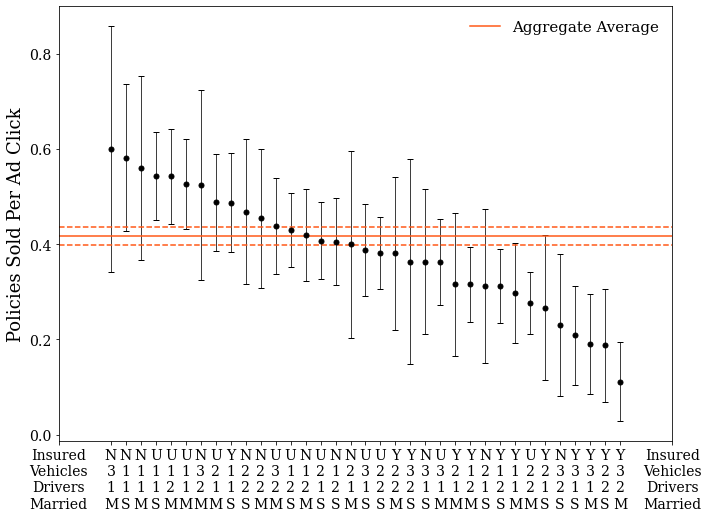

In [10]:
#Let's now investigate the specific customer information combinations

#Necessary entry for effective labeling
CustomerLabels = ["Insured\nVehicles\nDrivers\nMarried"]

for i in range(len(categories_df)):
        CustomerInfo = categories_df.iloc[i][["Insured","Vehicles","Drivers","Marital Status"]].values
        CustomerLabel = str(CustomerInfo[0]).replace('unknown','U')+'\n'+str(int(CustomerInfo[1]))+'\n'+str(int(CustomerInfo[2]))+'\n'+str(CustomerInfo[3])
        CustomerLabels.append(CustomerLabel)
CustomerLabels.append("Insured\nVehicles\nDrivers\nMarried")

plt.figure(figsize=(11.0,8))

plt.errorbar(x=categories_df.index, y=categories_df["Policies Sold per Click"],
             yerr=categories_df["Policies Sold per Click Uncertainty"],
             color='k', fmt='o', capsize=3, linewidth=0.75, markersize=5)

plt.axhline(0.417+0.0187,color=RootOrange,linestyle='--')
plt.axhline(0.417,color=RootOrange,linestyle='-',label='Aggregate Average')
plt.axhline(0.417-0.0187,color=RootOrange,linestyle='--')

plt.legend(fontsize=15,loc='best',frameon=False)
#plt.xlabel('Customer Information', fontsize=18)
plt.ylabel('Policies Sold Per Ad Click', fontsize=18)
plt.xticks([-3.5]+list(categories_df.index)+[35+2.5],CustomerLabels,fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(-3.5,35+2.5)

plt.show()

Let's double-check that it is reasonable to model all ads of the same rank as producing the same number of clicks as a function of their rank placement. That is, that the various customer demographics are all roughly equally likely to click on an ad when it is shown at a given rank. If this assumption is valid, the residuals should cluster around zero.

Mean Click Residual: 0.0
Median Click Residual: -0.15


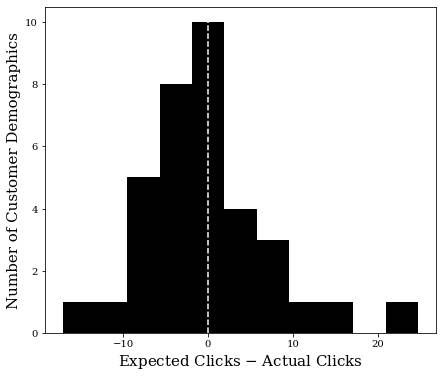

In [11]:
R1ExpClickPA = basic_info("rank",1,printout=False)[0]
R2ExpClickPA = basic_info("rank",2,printout=False)[0]
R3ExpClickPA = basic_info("rank",3,printout=False)[0]
R4ExpClickPA = basic_info("rank",4,printout=False)[0]
R5ExpClickPA = basic_info("rank",5,printout=False)[0]

def Exp_Clicks(N):
    Click_Num = 0
    
    #This uses the exponential fit we calculated earlier
    #Click_Num += categories_df['Rank1'].values[N]*f_exp(1,fit_exp_betas[0],fit_exp_betas[1])
    #Click_Num += categories_df['Rank2'].values[N]*f_exp(2,fit_exp_betas[0],fit_exp_betas[1])
    #Click_Num += categories_df['Rank3'].values[N]*f_exp(3,fit_exp_betas[0],fit_exp_betas[1])
    #Click_Num += categories_df['Rank4'].values[N]*f_exp(4,fit_exp_betas[0],fit_exp_betas[1])
    #Click_Num += categories_df['Rank5'].values[N]*f_exp(5,fit_exp_betas[0],fit_exp_betas[1])
    
    #This takes the direct values from the data that had been used to fit the exponential
    Click_Num += categories_df['Rank1'].values[N]*R1ExpClickPA
    Click_Num += categories_df['Rank2'].values[N]*R2ExpClickPA
    Click_Num += categories_df['Rank3'].values[N]*R3ExpClickPA
    Click_Num += categories_df['Rank4'].values[N]*R4ExpClickPA
    Click_Num += categories_df['Rank5'].values[N]*R5ExpClickPA
    return Click_Num

ClickResiduals = []
for i in range(len(categories_df)):
    ClickResiduals.append( Exp_Clicks(i) - categories_df['Total Clicks'].values[i] )
ClickResiduals = np.array( ClickResiduals )

print("Mean Click Residual:",round(np.mean(ClickResiduals),3))
print("Median Click Residual:",round(np.median(ClickResiduals),3))

plt.figure(figsize=(7,6))
plt.hist(ClickResiduals, 11, facecolor='k')
plt.axvline(0.0,color='white',linestyle='--')
plt.xlabel('Expected Clicks $-$ Actual Clicks', fontsize=15)
plt.ylabel('Number of Customer Demographics', fontsize=15)
plt.show()

So yep, it looks like we're making a reasonable assumption here.

Building off our list of all 35 unique customer information combinations, we can put together a series of targeted minimum bid strategies. The idea for these strategies is to continue submitting \\\$10 bids for those customers most likely to actually purchase a policy once they click on an ad, while submitting \\$0.01 bids for those customers who are unlikely to do so. We can vary the number of expected policies sold in this framework by shifting the cutoff threshold for when we switch from \\\$10 to \\\$0.01 bids.

In [12]:
# We'll assume for now that the lowest possible bid one can make is $0.01,
# since I doubt the search host would let you bid $0.00
MinBidVal = 0.01

policystats_df = pd.DataFrame({
                        'Set ID':[],
                        'Policies From $10 Bids':[],
                        'Uncertainty in $10 Bid Sales':[],
                        'Policies from Minimum Bids':[],
                        'Uncertainty in Minimum Bid Sales':[],
                        'Total Policies Sold':[],
                        'Uncertainty in Total Sales':[],
                        'Ad Cost Per Policy Sold':[],
                        'Uncertainty in Cost Per Sale':[]
                                })

for i in range(35):
    TenDollarPolicies = sum(categories_df.iloc[0:i+1]["Total Policies Sold"])
    TenDollarUncertainty = np.sqrt(sum( np.array(categories_df.iloc[0:i+1]["Total Policies Sold Uncertainty"])**2 ))
    TenDollarClicks = sum(categories_df.iloc[0:i+1]["Total Clicks"])
    TenDollarClickUncertainty = np.sqrt(sum( np.array(categories_df.iloc[0:i+1]["Total Click Uncertainty"])**2 ))
    MinBidPolicies = sum(categories_df.iloc[i:-1]["Expected Policies Sold at Rank 5"])
    MinBidUncertainty = np.sqrt(sum( np.array(categories_df.iloc[i:-1]["Uncertainty in Rank 5 Sales Estimate"])**2 ))
    MinBidClicks = sum(categories_df.iloc[i:-1]["Expected Clicks at Rank 5"])
    MinBidClickUncertainty = np.sqrt(sum( np.array(categories_df.iloc[i:-1]["Uncertainty in Rank 5 Clicks Estimate"])**2 ))
    TotalPolicies = TenDollarPolicies+MinBidPolicies
    TotalUncertainty = np.sqrt( TenDollarUncertainty**2 + MinBidUncertainty**2 )
    CostPerSale = (10.0*TenDollarClicks + MinBidVal*MinBidClicks) / (TenDollarPolicies+MinBidPolicies)
    CostUncertainty = CostPerSale*np.sqrt( ((10.0*TenDollarClickUncertainty+MinBidVal*MinBidClickUncertainty)/(10.0*TenDollarClicks+MinBidVal*MinBidClicks))**2 + (TotalUncertainty/TotalPolicies)**2 )
    new_row = {'Set ID':i, 'Policies From $10 Bids':TenDollarPolicies, 'Uncertainty in $10 Bid Sales':TenDollarUncertainty,
               'Policies from Minimum Bids':MinBidPolicies, 'Uncertainty in Minimum Bid Sales':MinBidUncertainty,
               'Total Policies Sold':TotalPolicies, 'Uncertainty in Total Sales':TotalUncertainty,
               'Ad Cost Per Policy Sold':CostPerSale,'Uncertainty in Cost Per Sale':CostUncertainty
                               }
    policystats_df = policystats_df.append(new_row, ignore_index=True)

policystats_df
    

,Set ID,Policies From $10 Bids,Uncertainty in $10 Bid Sales,Policies from Minimum Bids,Uncertainty in Minimum Bid Sales,Total Policies Sold,Uncertainty in Total Sales,Ad Cost Per Policy Sold,Uncertainty in Cost Per Sale
0,0.0,9.0,3.000000,82.211919,4.793720,91.211919,5.655064,1.667323,0.437027
1,1.0,34.0,5.830952,78.811220,4.564691,112.811220,7.405161,5.159266,0.755284
2,2.0,48.0,6.928203,75.441360,4.475953,123.441360,8.248282,6.739760,0.864595
3,3.0,117.0,10.816654,71.848170,4.302244,188.848170,11.640846,11.130110,1.029341
4,4.0,174.0,13.190906,68.594493,4.265771,242.594493,13.863506,12.992220,1.042353
5,5.0,233.0,15.264338,65.180962,4.219245,298.180962,15.836730,14.326127,1.029169
6,6.0,244.0,15.620499,61.868489,4.176522,305.868489,16.169210,14.652426,1.038668
7,7.0,285.0,16.881943,58.216227,3.938724,343.216227,17.335327,15.505227,1.031961
8,8.0,323.0,17.972201,55.418467,3.894992,378.418467,18.389425,16.123918,1.019769
9,9.0,338.0,18.384776,52.396721,3.840644,390.396721,18.781655,16.448720,1.023448


In [13]:
opt_ind = [i for i,x in enumerate(policystats_df["Total Policies Sold"]) if x>400][0]

print("The Set ID "+str(opt_ind)+" bid strategy, printed below, is expected to yield "+str(round(policystats_df.iloc[opt_ind]["Total Policies Sold"],1))+" policy sales, at a cost per policy of $"+str(round(policystats_df.iloc[opt_ind]["Ad Cost Per Policy Sold"],2))+"." )
print()

for i in range(len(categories_df)):
    if i <= opt_ind:
        BidVal = "10.00"
    else:
        BidVal = "00.01"
    FullCustomerInfo = categories_df.iloc[i][["Insured","Vehicles","Drivers","Marital Status"]].values
    print("Insured: "+str(FullCustomerInfo[0]).replace('unknown','U'),'\t',
          "Vehicles: "+str(FullCustomerInfo[1]),'\t',
          "Drivers: "+str(FullCustomerInfo[2]),'\t',
          "Marital Status: "+str(FullCustomerInfo[3]),'\t',
          "Bid: $"+BidVal,
         )

The Set ID 10 bid strategy, printed below, is expected to yield 402.2 policy sales, at a cost per policy of $16.79.

Insured: N 	 Vehicles: 3.0 	 Drivers: 1.0 	 Marital Status: M 	 Bid: $10.00
Insured: N 	 Vehicles: 1.0 	 Drivers: 1.0 	 Marital Status: S 	 Bid: $10.00
Insured: N 	 Vehicles: 1.0 	 Drivers: 1.0 	 Marital Status: M 	 Bid: $10.00
Insured: U 	 Vehicles: 1.0 	 Drivers: 1.0 	 Marital Status: S 	 Bid: $10.00
Insured: U 	 Vehicles: 1.0 	 Drivers: 2.0 	 Marital Status: M 	 Bid: $10.00
Insured: U 	 Vehicles: 1.0 	 Drivers: 1.0 	 Marital Status: M 	 Bid: $10.00
Insured: N 	 Vehicles: 3.0 	 Drivers: 2.0 	 Marital Status: M 	 Bid: $10.00
Insured: U 	 Vehicles: 2.0 	 Drivers: 1.0 	 Marital Status: M 	 Bid: $10.00
Insured: Y 	 Vehicles: 1.0 	 Drivers: 1.0 	 Marital Status: S 	 Bid: $10.00
Insured: N 	 Vehicles: 2.0 	 Drivers: 2.0 	 Marital Status: S 	 Bid: $10.00
Insured: N 	 Vehicles: 2.0 	 Drivers: 2.0 	 Marital Status: M 	 Bid: $10.00
Insured: U 	 Vehicles: 3.0 	 Drivers: 2.0 	 Mar

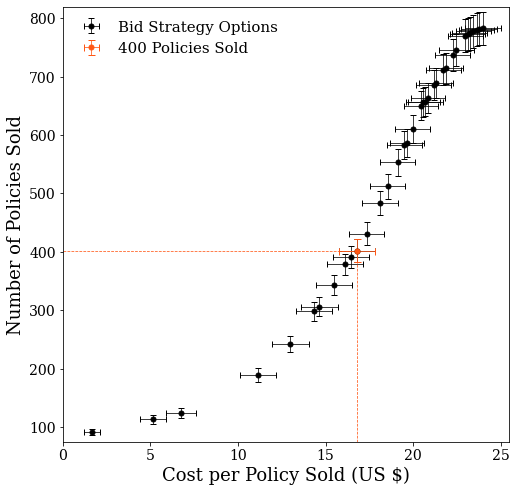

In [14]:
plt.figure(figsize=(8,8))

plt.errorbar(x=policystats_df["Ad Cost Per Policy Sold"], y=policystats_df["Total Policies Sold"],
             xerr=policystats_df["Uncertainty in Cost Per Sale"], yerr=policystats_df["Uncertainty in Total Sales"],
             color='k', fmt='o', capsize=3, linewidth=0.75, markersize=5,label='Bid Strategy Options')

#Make an aesthetic orange errorbar for the point of 400 sales
opt_ind = [i for i,x in enumerate(policystats_df["Total Policies Sold"]) if x>400][0]
plt.errorbar(x=policystats_df.iloc[opt_ind]["Ad Cost Per Policy Sold"], y=policystats_df.iloc[opt_ind]["Total Policies Sold"],
             xerr=policystats_df.iloc[opt_ind]["Uncertainty in Cost Per Sale"], yerr=policystats_df.iloc[opt_ind]["Uncertainty in Total Sales"],
             color=RootOrange, fmt='o', capsize=3.5, linewidth=0.76, markersize=5.01,label='400 Policies Sold')

plt.axhline(policystats_df.iloc[opt_ind]["Total Policies Sold"],
            xmax=policystats_df.iloc[opt_ind]["Ad Cost Per Policy Sold"]/25.5,
            linewidth=0.75,color=RootOrange,linestyle='--')
plt.axvline(policystats_df.iloc[opt_ind]["Ad Cost Per Policy Sold"],
            ymax=(policystats_df.iloc[opt_ind]["Total Policies Sold"]-75)/(820-75), 
            linewidth=0.75,color=RootOrange,linestyle='--')

plt.legend(fontsize=15,loc='best',frameon=False)
plt.xlabel('Cost per Policy Sold (US \$)', fontsize=18)
plt.ylabel('Number of Policies Sold', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(0,25.5)
plt.ylim(75,820)

plt.show()

Since the challenge specified that they want to ensure that any new bidding strategy must be expected to sell more than 400 policies per 10,000 ads shown, we would pick Set ID 10 as our group of customers to keep at \\\$10 bids, while assigning all other combinations the minimum allowed bid. This will provide the lowest cost per policy sold that yields an expected total sale count of at least 400. This would cut the cost per policy sold from \\\$23.98 to \\\$16.79, a savings of nearly 30\% over the current flat \\\$10 bid strategy.

If management were interested, we could spend less per policy sold if they were willing to accept fewer overall sales. And similarly we could increase sales by spending more per policy sale (while still being more efficient than the flat \\\$10 bid strategy) if the goal is to sell up to 783 policies. Unfortunately this model does not allow us to make any quantitative predictions about how to increase sales beyond the 783 policies sold using the current flat $10 bid method.